# EDSA Movie Recommendation Predict

## Building a functional recommender system

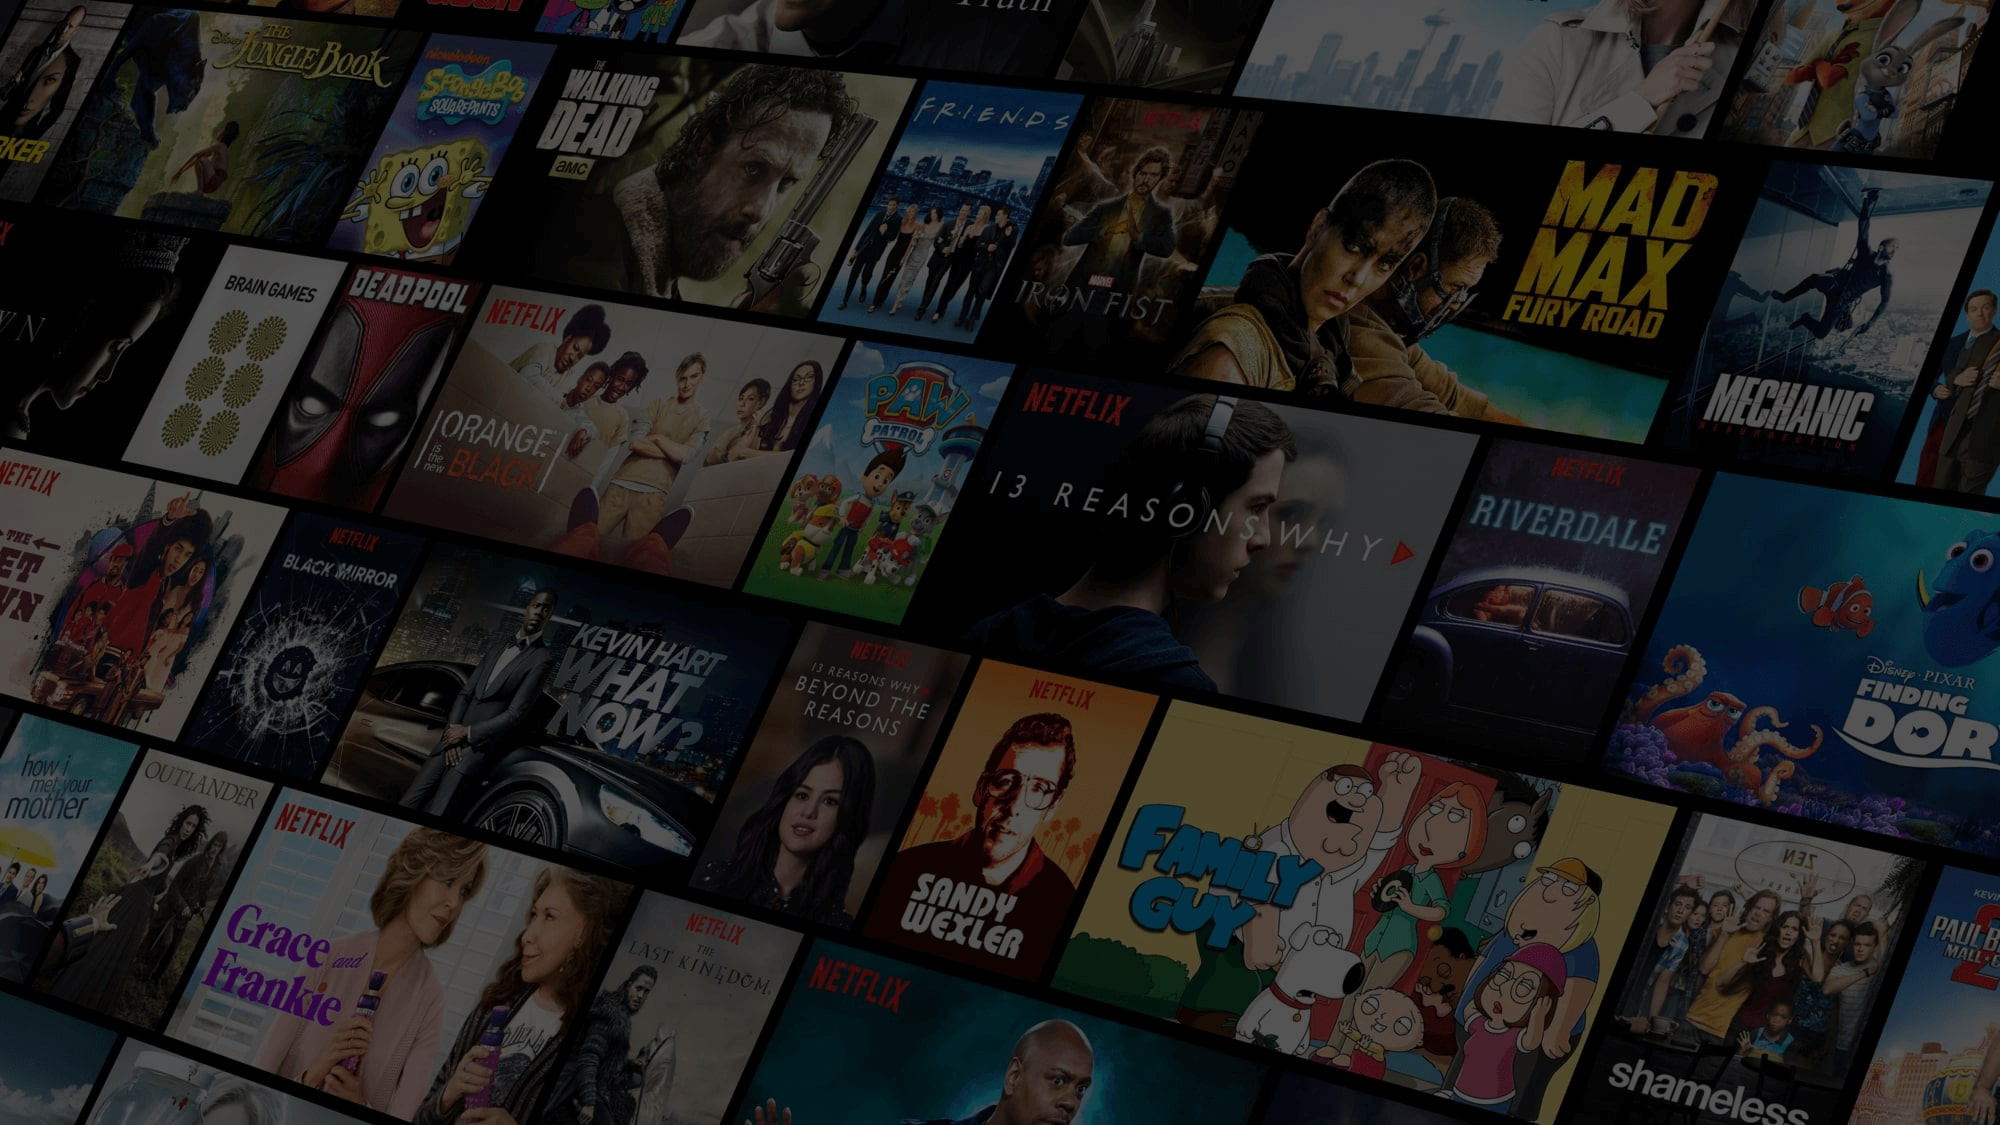

In [1]:
from PIL import Image
img = Image.open('Moviepic')
img

### Comet experiment
Comet experiments provide an easy way to track, compare, and analyze data from experiments, allowing scientists to better understand their results.

In [2]:
""" # import comet_ml at the top of your file

from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="55rMzKDU8ecQ4foxuBrTZzkBY",
    project_name="team-gm-2",
    workspace="odenyor",
)

# Run your code and go to /a """

' # import comet_ml at the top of your file\n\nfrom comet_ml import Experiment\n\n# Create an experiment with your api key\nexperiment = Experiment(\n    api_key="55rMzKDU8ecQ4foxuBrTZzkBY",\n    project_name="team-gm-2",\n    workspace="odenyor",\n)\n\n# Run your code and go to /a '

# Table of contents:

 ### 1. Intoduction
 
 ### 1.1 Problem Statement
 ### 1.2 Problem Framework
 
 ### 2. Import libraries & Datasets

 ### 3. Exploratory data analysis
    
 ### 4. Data Preprocessing
    
    
 ### 5. Building classification models
    
 ### 6. Model evaluation
    
 ### 7. Model Selection
    
 ### 8. Hyperparameter tuning
 




### 1. Intoduction:
In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

…ever wondered how Netflix, Amazon Prime, Showmax, Disney and the likes somehow know what to recommend to you

### 1.1 Problem Statement:
Build a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user
will rate a movie they have not yet viewed based on their historical preferences.

### 1.2 Problem Framework:
Data:
This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!
The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB


 ### 2. Import libraries and datasets

In [3]:
#!pip install -r requirements.txt

#!pip install scikit-surprise==1.1.0

In [4]:
# Install packages here


# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle


In [5]:
#The below code reads in 8 different csv files into 8 separate pandas dataframes. 

df_sample_submission = pd.read_csv('sample_submission.csv')
df_movies = pd.read_csv('movies.csv')
df_imdb = pd.read_csv('imdb_data.csv')
df_genome_scores = pd.read_csv('genome_scores.csv')
df_genome_tags = pd.read_csv('genome_tags.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_tags = pd.read_csv('tags.csv')
df_links = pd.read_csv('links.csv')

 ### 3. Data evaluation
 
The data supplied set contains a variety of files that can be used to evaluate the strength of a movie in relation to tag-related properties. These files include genome_scores.csv which is a score mapping, genome_tags.csv which are user-assigned tags, imdb_data.csv which is additional movie metadata, links.csv which is a mapping between a MovieLens ID and associated IMDB and TMDB IDs, sample_submission.csv which is a sample of the submission format, tags.csv which are user-assigned tags, test.csv which is the test split of the dataset containing user and movie IDs with no rating data, and train.csv which is the training split of the dataset containing user and movie IDs with associated rating data.

In [6]:
#viewing training data
df_train.head()

userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837

In [7]:
#Viewing movies data
df_movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [8]:
#Viewing imdb dataframe
df_imdb.head()

movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director  runtime       budget  \
0        John Lasseter     81.0  $30,000,000   
1   Jonathan Hensleigh    104.0  $65,000,000   
2  Mark Steven Johnson    101.0  $25,000,000   
3       Terry McMillan    124.0  $16,000,000   
4       Albert Hackett    106.0  $30,000,000   

                                       plot_keywords  
0                   toy|rivalry|cowboy|cgi animation  
1                   board game|adventurer|fight|game  
2                         boat|lake|neighbor|rivalry  
3  black american|husband wife relationship|betra...  
4                    fatherhood|doberman|dog|mansion

In [9]:
#Viewing Genrome tags
df_genome_tags.head()

tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s

In [10]:
#Viewing scores
df_genome_scores .head()

movieId  tagId  relevance
0        1      1    0.02875
1        1      2    0.02375
2        1      3    0.06250
3        1      4    0.07575
4        1      5    0.14075

In [11]:
#viewing tags
df_tags.head()

userId  movieId               tag   timestamp
0       3      260           classic  1439472355
1       3      260            sci-fi  1439472256
2       4     1732       dark comedy  1573943598
3       4     1732    great dialogue  1573943604
4       4     7569  so bad it's good  1573943455

In [12]:
#view links
df_links.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

### 4. Data Preprocessing

Before applying our machine learning model to the raw data, we must first process it to make it suitable for use. This step is essential in the creation of a successful machine learning model.

### 4.1 Checking for null values
We need to check if our dataset contains any missing values, as we cannot train our model with a dataset that has missing values. We will need to handle any missing data found in the dataset before we can proceed with training the model.

In [13]:
#check for missing values
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

### 4.2 Checking for duplicates
Checking for duplicate records in a dataset can be done to ensure that unnecessary values are not included. To do this, the below code will be used to check if any duplicate values exist within the dataset. If duplicates are found, they can then be removed.

In [14]:
# check duplicates
dup_bool = df_train.duplicated(['userId', 'movieId', 'rating'])

# display duplicates
dups = df_train[dup_bool]
print(dups)
print("Number of duplicate records:", sum(dup_bool))

Empty DataFrame
Columns: [userId, movieId, rating, timestamp]
Index: []
Number of duplicate records: 0


### Creating Copy
Creating a copy of the training dataset is a common practice when training machine learning models, as it allows the model to be tested on data that it hasn't seen before. This helps to prevent overfitting and ensure that the model can generalize to new data. Additionally, creating a copy of the training dataset can be used to create a validation dataset, which is used to evaluate the performance of the model and tune its hyperparameters.

In [15]:
# Create a copy of the train data
copy_train = df_train.copy()

copy_train.head()

userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837

### 4.4 Merge datasets

In [16]:
# Merge the ratings and movies
df_merge1 = pd.merge(copy_train, df_movies, on='movieId')
# View the first 5 rows
df_merge1.head()

userId  movieId  rating   timestamp             title  \
0    5163    57669     4.0  1518349992  In Bruges (2008)   
1   87388    57669     3.5  1237455297  In Bruges (2008)   
2  137050    57669     4.0  1425631854  In Bruges (2008)   
3  120490    57669     4.5  1408228517  In Bruges (2008)   
4   50616    57669     4.5  1446941640  In Bruges (2008)   

                        genres  
0  Comedy|Crime|Drama|Thriller  
1  Comedy|Crime|Drama|Thriller  
2  Comedy|Crime|Drama|Thriller  
3  Comedy|Crime|Drama|Thriller  
4  Comedy|Crime|Drama|Thriller

In [17]:
# Merging the dataset with that of the imbd
df_merge2 = pd.merge(copy_train, df_imdb, on="movieId")
# View first 5 rows
df_merge2.head()

userId  movieId  rating   timestamp  \
0    5163    57669     4.0  1518349992   
1   87388    57669     3.5  1237455297   
2  137050    57669     4.0  1425631854   
3  120490    57669     4.5  1408228517   
4   50616    57669     4.5  1446941640   

                                          title_cast         director  \
0  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
1  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
2  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
3  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
4  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   

   runtime       budget              plot_keywords  
0    107.0  $15,000,000  dwarf|bruges|irish|hitman  
1    107.0  $15,000,000  dwarf|bruges|irish|hitman  
2    107.0  $15,000,000  dwarf|bruges|irish|hitman  
3    107.0  $15,000,000  dwarf|bruges|irish|hitman  
4    107.0  $15,000,000  dwarf|bruges|irish|hitman

In [18]:
#Merge df_merge1 and df_imdb on movieId
df_merge3 = df_merge1.merge(df_imdb, on="movieId")

#View first 5 rows
df_merge3.head()

userId  movieId  rating   timestamp             title  \
0    5163    57669     4.0  1518349992  In Bruges (2008)   
1   87388    57669     3.5  1237455297  In Bruges (2008)   
2  137050    57669     4.0  1425631854  In Bruges (2008)   
3  120490    57669     4.5  1408228517  In Bruges (2008)   
4   50616    57669     4.5  1446941640  In Bruges (2008)   

                        genres  \
0  Comedy|Crime|Drama|Thriller   
1  Comedy|Crime|Drama|Thriller   
2  Comedy|Crime|Drama|Thriller   
3  Comedy|Crime|Drama|Thriller   
4  Comedy|Crime|Drama|Thriller   

                                          title_cast         director  \
0  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
1  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
2  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
3  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
4  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   

   runtime       budget              plot_keywords  
0    107.0  $15,000,000  dwarf|bruges|irish|hitman  
1    107.0  $15,000,000  dwarf|bruges|irish|hitman  
2    107.0  $15,000,000  dwarf|bruges|irish|hitman  
3    107.0  $15,000,000  dwarf|bruges|irish|hitman  
4    107.0  $15,000,000  dwarf|bruges|irish|hitman

In [19]:
# Check the null values of the data that has just been merged.
df_merge3.isnull().sum()

userId                 0
movieId                0
rating                 0
timestamp              0
title                  0
genres                 0
title_cast       2604407
director         2602688
runtime          2653058
budget           3152276
plot_keywords    2610043
dtype: int64

In [20]:
# View keywords
df_merge3['plot_keywords'].tail(100)

9632931                                                NaN
9632932    sex|male frontal nudity|prostitution|perversity
9632933                                     color in title
9632934                                                NaN
9632935         murder|serial killer|peeping|female nudity
                                ...                       
9633026                                                NaN
9633027      janitor|income|housing problem|social problem
9633028                                                NaN
9633029                     soldier|italy|partisan|fascist
9633030             genius|artist|greek american|direction
Name: plot_keywords, Length: 100, dtype: object

In [21]:
# Extract unique values from rating column
df_train['rating'].unique()

array([4. , 4.5, 5. , 2. , 3. , 1. , 3.5, 2.5, 0.5, 1.5])

In [22]:
df_merge2 = pd.merge(copy_train, df_imdb, on='movieId')
df_merge2.head(1)

userId  movieId  rating   timestamp  \
0    5163    57669     4.0  1518349992   

                                          title_cast         director  \
0  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   

   runtime       budget              plot_keywords  
0    107.0  $15,000,000  dwarf|bruges|irish|hitman

In [23]:
# Merging the merge data earlier on with the df_imbd
df_merge3 = df_merge1.merge(df_imdb, left_on="movieId", right_on="movieId")
df_merge3.head()

userId  movieId  rating   timestamp             title  \
0    5163    57669     4.0  1518349992  In Bruges (2008)   
1   87388    57669     3.5  1237455297  In Bruges (2008)   
2  137050    57669     4.0  1425631854  In Bruges (2008)   
3  120490    57669     4.5  1408228517  In Bruges (2008)   
4   50616    57669     4.5  1446941640  In Bruges (2008)   

                        genres  \
0  Comedy|Crime|Drama|Thriller   
1  Comedy|Crime|Drama|Thriller   
2  Comedy|Crime|Drama|Thriller   
3  Comedy|Crime|Drama|Thriller   
4  Comedy|Crime|Drama|Thriller   

                                          title_cast         director  \
0  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
1  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
2  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
3  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
4  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   

   runtime       budget              plot_keywords  
0    107.0  $15,000,000  dwarf|bruges|irish|hitman  
1    107.0  $15,000,000  dwarf|bruges|irish|hitman  
2    107.0  $15,000,000  dwarf|bruges|irish|hitman  
3    107.0  $15,000,000  dwarf|bruges|irish|hitman  
4    107.0  $15,000,000  dwarf|bruges|irish|hitman

### 5  Exploratory data analysis

In [24]:
!pip install --upgrade pandas_profiling

from pandas_profiling import ProfileReport

In [25]:
profile = ProfileReport(df_train, title ='Training Data')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

We can observe that the majority of our movies have been rated positively, with a rating of higher than 3. A minority of movies have been rated below average. 

Hence, it can be deduced that people are likely watching movies that have been recommended to them in some way, either by their social groups or by the recommender system.

In [26]:
df_merge3.rename(columns={'rating_x': 'rating', 'rating_y': 'numRatings'}, inplace=True)
#Create dataframe
num_ratings = pd.DataFrame(df_merge3.groupby('movieId').count()['rating']).reset_index()
#merge num ratings with df_merge3
df_merge3 = pd.merge(left=df_merge3, right=num_ratings, on='movieId')
# rename columns
df_merge3.rename(columns={'rating_x': 'rating', 'rating_y': 'numRatings'}, inplace=True)

In [27]:
# pre_process the budget column

# remove commas
df_merge3['budget'] = df_merge3['budget'].str.replace(',', '')

# remove currency signs like "$" and "GBP"
df_merge3['budget'] = df_merge3['budget'].str.extract('(\d+)', expand=False)

# convert the feature into a float
df_merge3['budget'] = df_merge3['budget'].astype(float)

# remove nan values and replacing with 0
df_merge3['budget'] = df_merge3['budget'].replace(np.nan, 0)

# convert the feature into an integer
df_merge3['budget'] = df_merge3['budget'].astype(int)

#extracting date from title column
df_merge3['release_year'] = df_merge3.title.str.extract('(\(\d\d\d\d\))', expand=False)

#adding date to realse year column
df_merge3['release_year'] = df_merge3.release_year.str.extract('(\d\d\d\d)', expand=False)

#view top 2 rows of the dataframe
df_merge3.head(2)

userId  movieId  rating   timestamp             title  \
0    5163    57669     4.0  1518349992  In Bruges (2008)   
1   87388    57669     3.5  1237455297  In Bruges (2008)   

                        genres  \
0  Comedy|Crime|Drama|Thriller   
1  Comedy|Crime|Drama|Thriller   

                                          title_cast         director  \
0  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
1  Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   

   runtime    budget              plot_keywords  numRatings release_year  
0    107.0  15000000  dwarf|bruges|irish|hitman        4253         2008  
1    107.0  15000000  dwarf|bruges|irish|hitman        4253         2008

In [28]:
#drop duplicates on dataframe
data_1= df_merge3.drop_duplicates('movieId')

#view top 2 rows of the dataframe
data_1.head(2)

userId  movieId  rating   timestamp                               title  \
0       5163    57669     4.0  1518349992                    In Bruges (2008)   
4253  106343        5     4.5  1206238739  Father of the Bride Part II (1995)   

                           genres  \
0     Comedy|Crime|Drama|Thriller   
4253                       Comedy   

                                             title_cast         director  \
0     Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...  Martin McDonagh   
4253  Steve Martin|Diane Keaton|Martin Short|Kimberl...   Albert Hackett   

      runtime    budget                    plot_keywords  numRatings  \
0       107.0  15000000        dwarf|bruges|irish|hitman        4253   
4253    106.0  30000000  fatherhood|doberman|dog|mansion        4648   

     release_year  
0            2008  
4253         1995

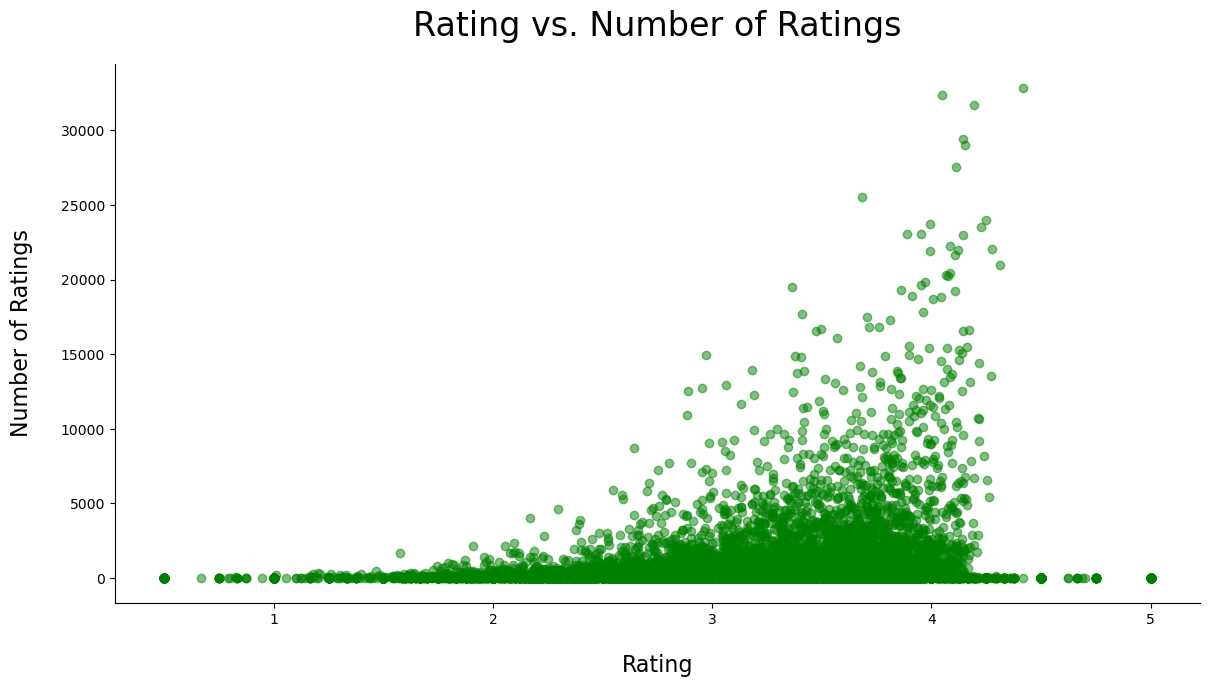

In [29]:
#create ratings dataframe
ratings_df = pd.DataFrame()

#extract average ratings
ratings_df['Mean_Rating'] = df_merge3.groupby('title')['rating'].mean().values

#extract average number of ratings
ratings_df['Num_Ratings'] = df_merge3.groupby('title')['rating'].count().values

#make a plot
fig, ax = plt.subplots(figsize=(14, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Rating vs. Number of Ratings', fontsize=24, pad=20)
ax.set_xlabel('Rating', fontsize=16, labelpad=20)
ax.set_ylabel('Number of Ratings', fontsize=16, labelpad=20)

plt.scatter(ratings_df['Mean_Rating'], ratings_df['Num_Ratings'], alpha=0.5, color='green')

As more people watch a movie, its average rating tends to go up. This implies that if a film is getting a lot of views, it likely has a decent budget and good promotion, and is highly rated.

### Genre Visualisation
Visualising genres is essential in building a recommendation engine, as it gives an insight into the content of a film. It is assumed that films in the same genre will have similar content. To gain an insight into which genres are the most popular, we will attempt to visualise them.

In [30]:
movies = df_movies.copy()

In [31]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    """  
    
    This function counts the number of times each 
    of the genre keywords appear  
    
    Input : movies dataframe, column from dataframe,
    label column from dataframe
    datatype : dataframe        
     output : list    
    
    """
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
       # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 25606],
 ['Comedy', 16870],
 ['Thriller', 8654],
 ['Romance', 7719],
 ['Action', 7348]]

The five most popular movie genres are Drama, Comedy, Thriller, Romance and Action. To enhance the visual impact, these genres will be represented in a word cloud.

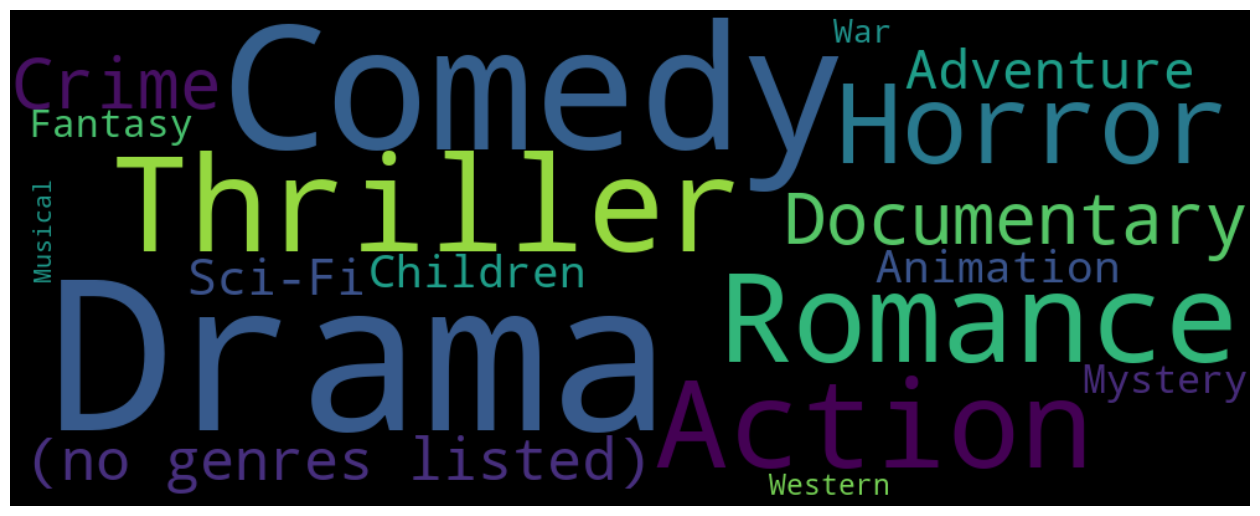

In [32]:
!pip install wordcloud
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='black')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [33]:
df = df_imdb[['movieId','title_cast','director', 'plot_keywords']]
df = df.merge(df_movies[['movieId', 'genres', 'title']], on='movieId', how='inner')
df.head(1)

movieId                                         title_cast       director  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...  John Lasseter   

                      plot_keywords  \
0  toy|rivalry|cowboy|cgi animation   

                                        genres             title  
0  Adventure|Animation|Children|Comedy|Fantasy  Toy Story (1995)

In [34]:
# Convert data types to strings for string handling
df['title_cast'] = df.title_cast.astype(str)
df['plot_keywords'] = df.plot_keywords.astype(str)
df['genres'] = df.genres.astype(str)
df['director'] = df.director.astype(str)

# Removing spaces between names
df['director'] = df['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df['title_cast'] = df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes between the actors' full names and getting only the first three names
df['title_cast'] = df['title_cast'].map(lambda x: x.split('|')[:3])
# Discarding the pipes between the plot keywords' and getting only the first five words
df['plot_keywords'] = df['plot_keywords'].map(lambda x: x.split('|')[:5])
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
df['genres'] = df['genres'].map(lambda x: x.lower().split('|'))
df['genres'] = df['genres'].apply(lambda x: " ".join(x))

df.head(1)

movieId                        title_cast      director  \
0        1  [tomhanks, timallen, donrickles]  johnlasseter   

                      plot_keywords  \
0  toy rivalry cowboy cgi animation   

                                        genres             title  
0  adventure animation children comedy fantasy  Toy Story (1995)

### Genre Popularity

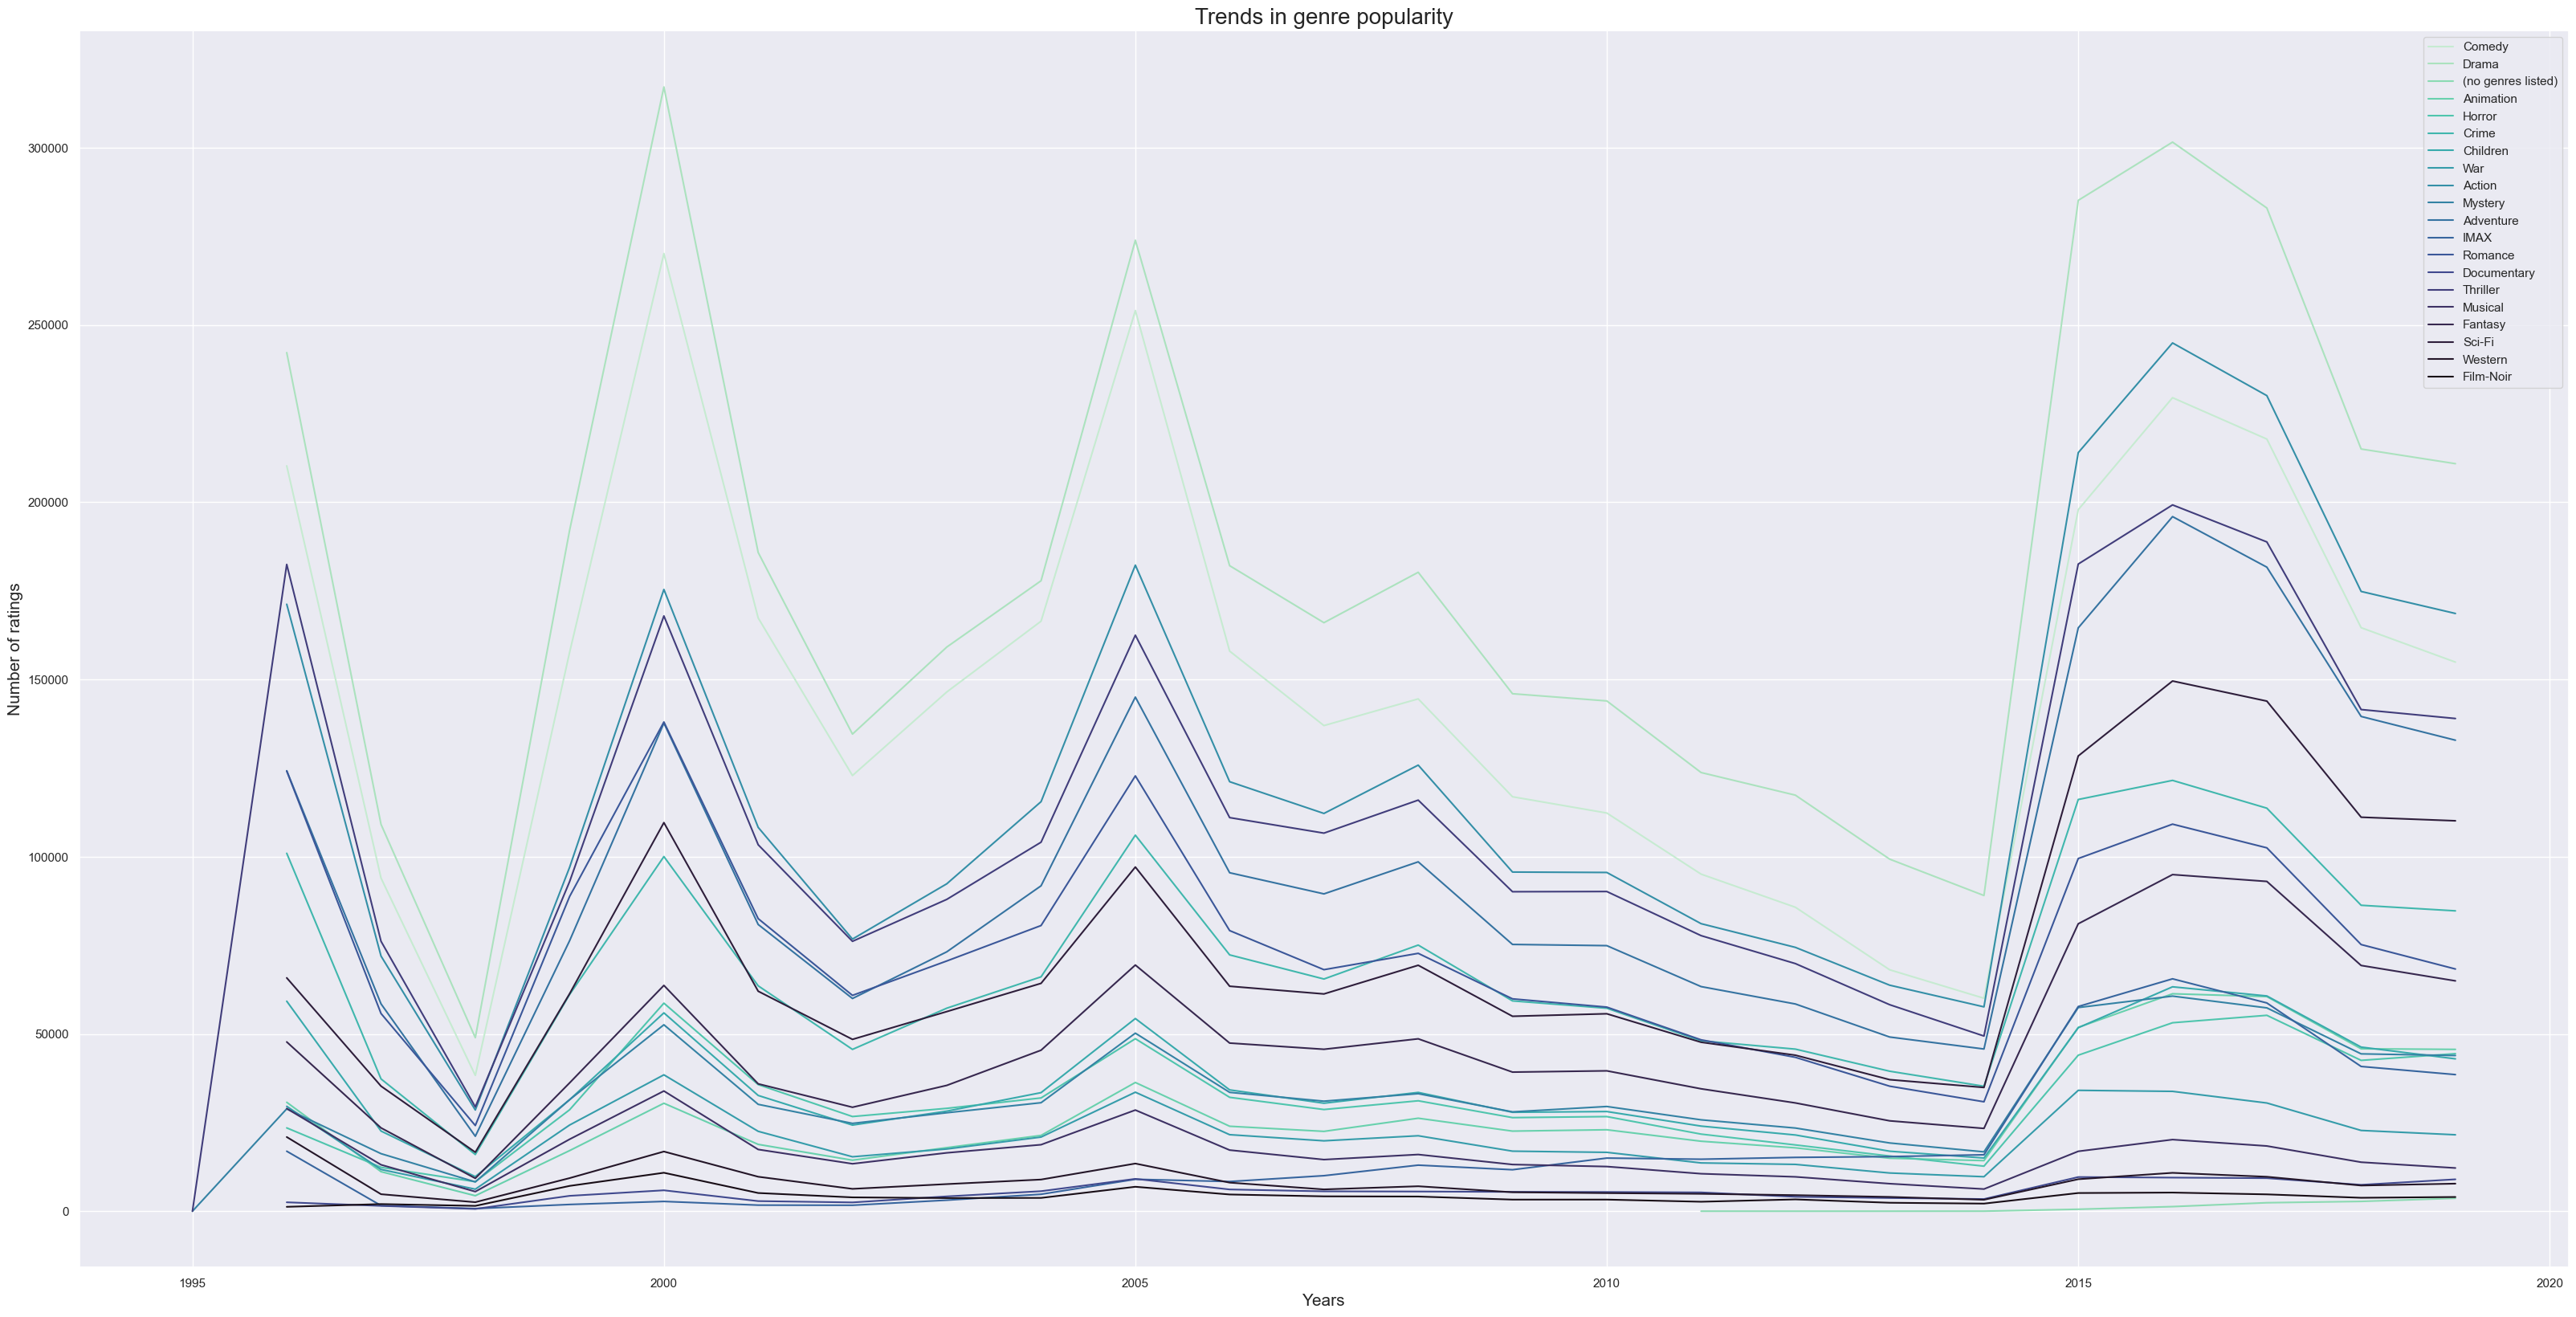

In [35]:
def most_watched(input_df): 
    
    """"
    This function gives out the number of ratings
    for each genre for each year since 1970  
    
    Input : dataframe
    datatype : dataframe        
    
    output : Figure (line graph)
    
    """
     # Create a copy of the input dataframe and merge it to the movies dataframe
    df = input_df.copy()
    df = df.merge(df_movies,on='movieId',how='left')
    
    # Create an empty dataframe
    b = pd.DataFrame()
    
    # Extract the timestamps and genres 
    timestamps = [timestamp for timestamp in df.timestamp]
    all_genres = set(','.join([genres.replace('|',',') for genres in df.genres]).split(','))
    
    # Get the number of ratings for each genre for each year since 1970
    for index,genre in enumerate(all_genres):
        a = pd.Series([int((timestamps[i]/31536000)+1970) for i,x in enumerate(df.genres) if genre in x])
        a = a.value_counts()
        b = pd.concat([b,pd.DataFrame({genre:a})],axis=1)
    
    # Plot the trends for each genre on the same line graph 
    plt.figure(figsize=(40,20))
    palette = sns.color_palette("mako_r", 20)
    sns.set()
    sns.set_palette("PuBuGn_d")
    plot = sns.lineplot(data=b, dashes=False, palette=palette)
     # Add plot labels
    plt.title('Trends in genre popularity',fontsize=20)
    plt.xlabel('Years', fontsize=15)
    plt.ylabel('Number of ratings', fontsize=15)
    
    plt.show()
    
    return

most_watched(df_train)

Netflix should consider the popularity of different genres when deciding which types of films to produce or license. For instance, if comedy becomes the most popular genre, Netflix should invest in more comedy movies than dramas. This is especially important in the current landscape where networks and production companies are producing their own streaming services, resulting in a decrease in the amount of content that is licensed to Netflix.

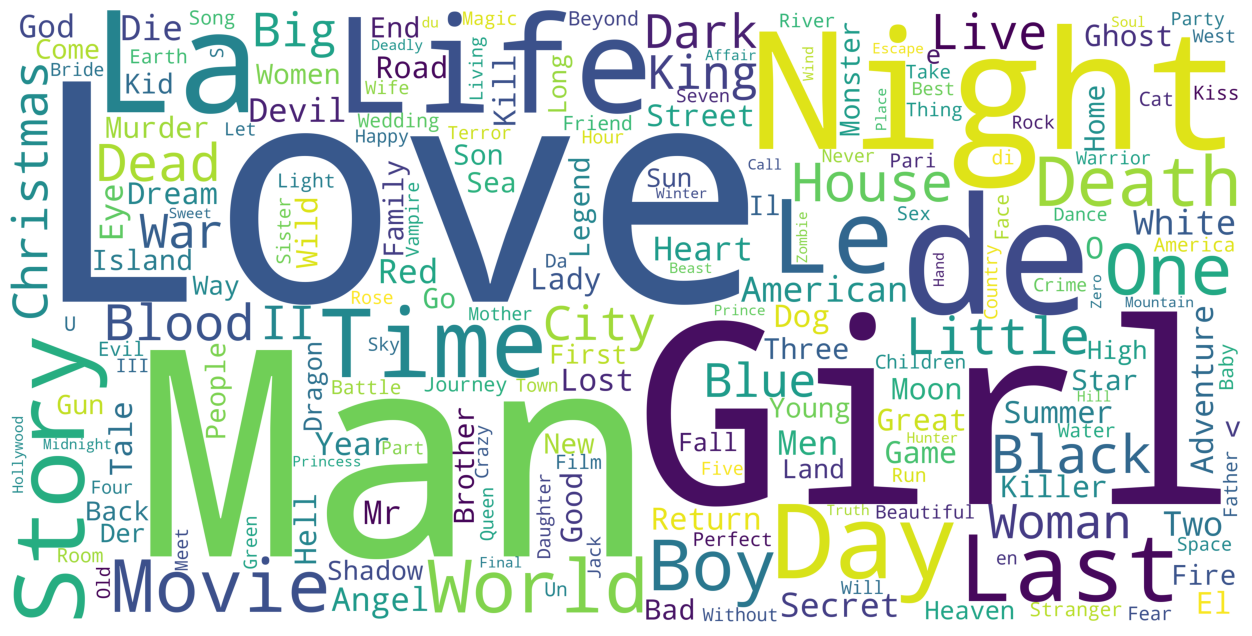

In [36]:
# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

We can see that Man, Girl, and Love are more popular than the other title words, while II, III, and three are less popular. This implies that there were not many franchise films, which is not ideal for Netflix since such films typically have established fanbases that could add to viewership and boost revenue. The popularity of Romance and Drama films is reflected in the most common title words. Therefore, any changes in the relative popularity of genres should be reflected in title popularity.

#### Published movies per year

In [37]:
# Create an empty list
years = []
# Finding the number of movies published in each year
for title in df_merge3['title']:
    year_subset = title[-5:-1]
    try: years.append(int(year_subset))
    except: years.append(9999)
# Create a new column in a dataframe.       
df_merge3['moviePubYear'] = years
print('The Number of Movies Published each year:',len(df_merge3[df_merge3['moviePubYear'] == 9999]))

The Number of Movies Published each year: 713


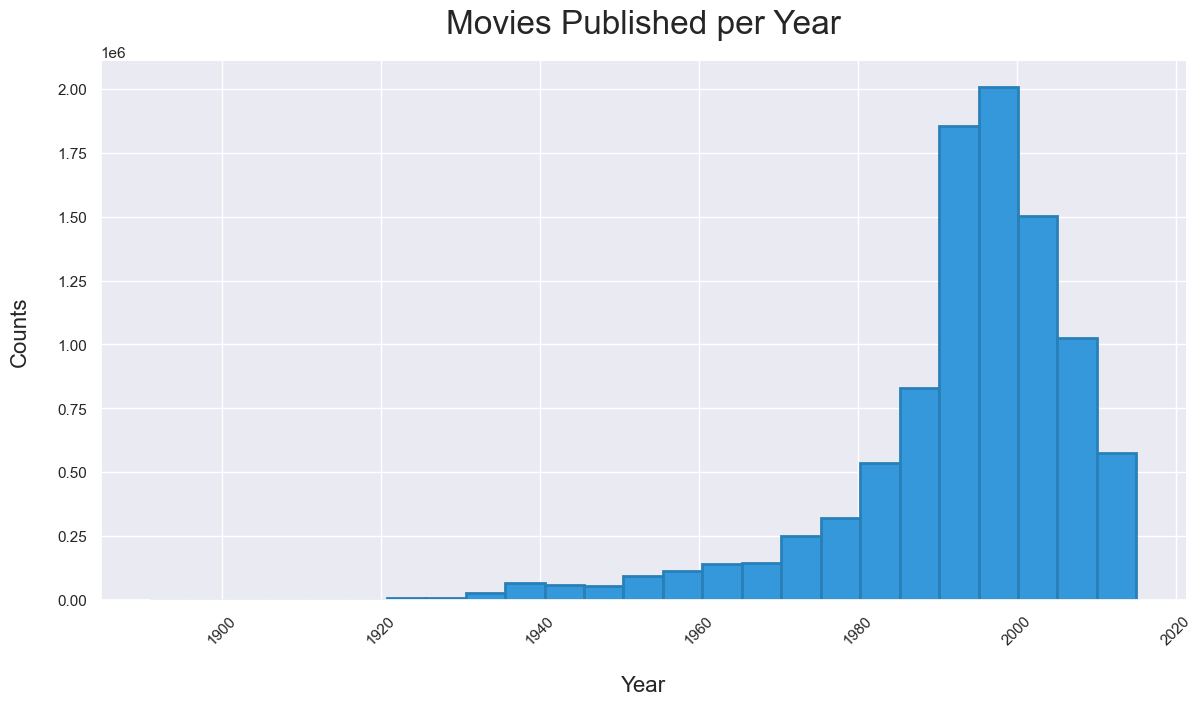

In [38]:
def make_histogram(dataset, attribute, bins=25, bar_color='#3498db', edge_color='#2980b9', 
                   title='Title', xlab='X', ylab='Y', sort_index=False):
    """"
    This function gives a plot of the
    number of movies published per year
    
    Input : dataframe, dataframe column,
    bins, colour of figure, title of figure,
    x and y labels
    datatype : dataframe   
    output : Figure (bar plot)
    
    """
    if attribute == 'moviePubYear':
        dataset = dataset[dataset['moviePubYear'] != 9999]
        
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2)
    
    plt.xticks(rotation=45)
    
    
make_histogram(df_merge3, 'moviePubYear', title='Movies Published per Year', xlab='Year', ylab='Counts')

We noticed a drop in the number of films released annually since 2000. Possible reasons for this could include the economic recessions in 2000 and 2009.

In [39]:
# Create a dataframe with the number of movies that the directors have made
director_m = pd.DataFrame(data_1.groupby('director').count()['title'].sort_values(ascending=False)).reset_index()
# View the first five directors
director_m.head()

director  title
0           Luc Besson     26
1     See full summary     25
2          Woody Allen     25
3         Stephen King     23
4  William Shakespeare     18

In [40]:
# the least and most number of movies by directors in the dataset.

print(f'No of unique movies: \t{len(data_1)}\nLeast produced: \t{director_m.title.min()}\nMost produced: \t\t{director_m.title.max()}')

No of unique movies: 	23544
Least produced: 	1
Most produced: 		26


In [41]:
# View the director and the count of ratings
pd.DataFrame(data_1.groupby('director').sum()['numRatings'].sort_values(ascending=False)).reset_index()

director  numRatings
0       Quentin Tarantino      109919
1        Michael Crichton       65157
2          J.R.R. Tolkien       62963
3         Lilly Wachowski       60988
4            Stephen King       59903
...                   ...         ...
9990    Jérôme Soubeyrand           1
9991       Timo Linnasalo           1
9992  Justus von Dohnányi           1
9993      Justin Donnelly           1
9994              50 Cent           1

[9995 rows x 2 columns]

### Ratings per director

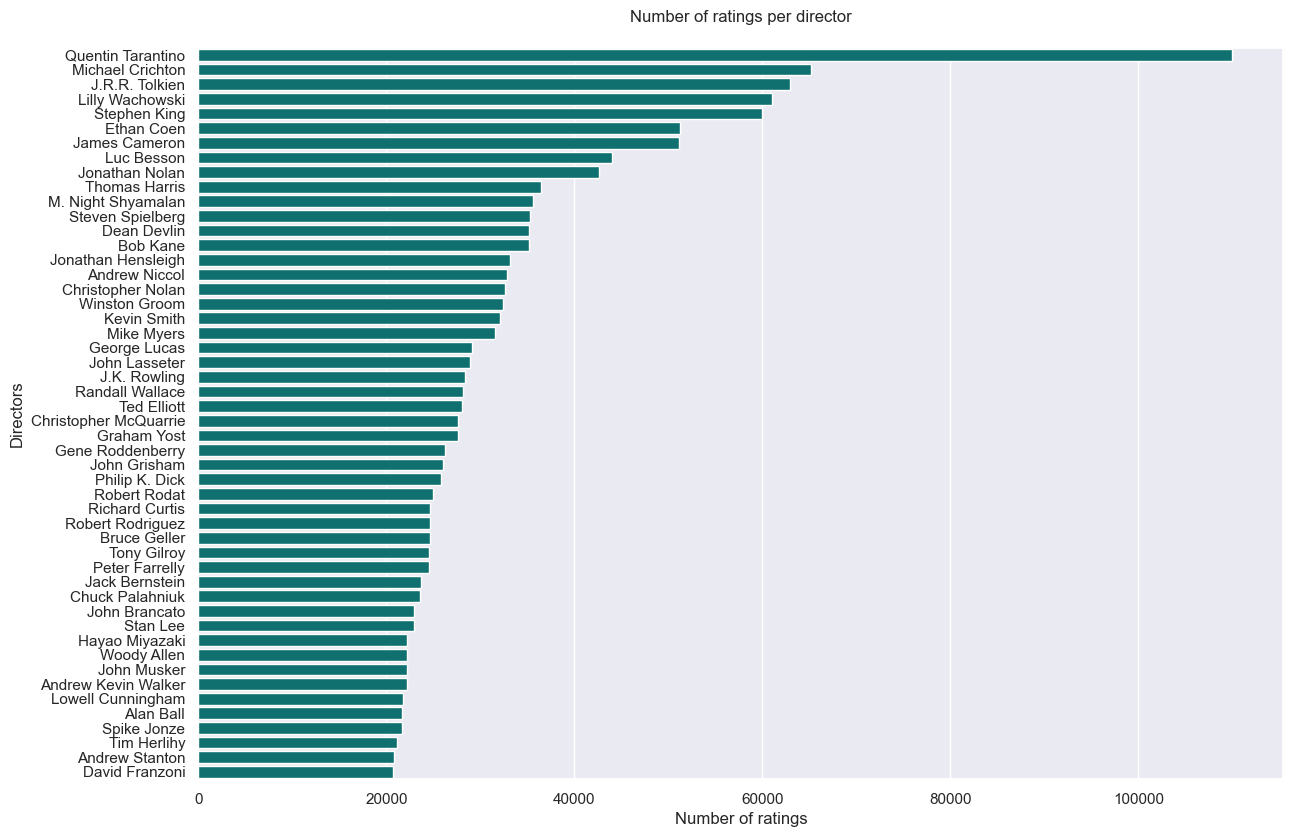

In [42]:
#df_merge3.sort_values(by='numRatings', ascending=False).drop_duplicates('movieId')[:100]
director_n = pd.DataFrame(data_1.groupby('director').sum()['numRatings'].sort_values(ascending=False)).reset_index()

# visualize the number of movies per director
plt.figure(figsize = (14, 9.5))
sns.barplot(data = director_n.head(50), y = 'director', x = 'numRatings', color = 'teal')
plt.ylabel('Directors')
plt.xlabel('Number of ratings')
plt.title('Number of ratings per director\n')
#plt.xlim(0, 27)
plt.show()

### Movies per director

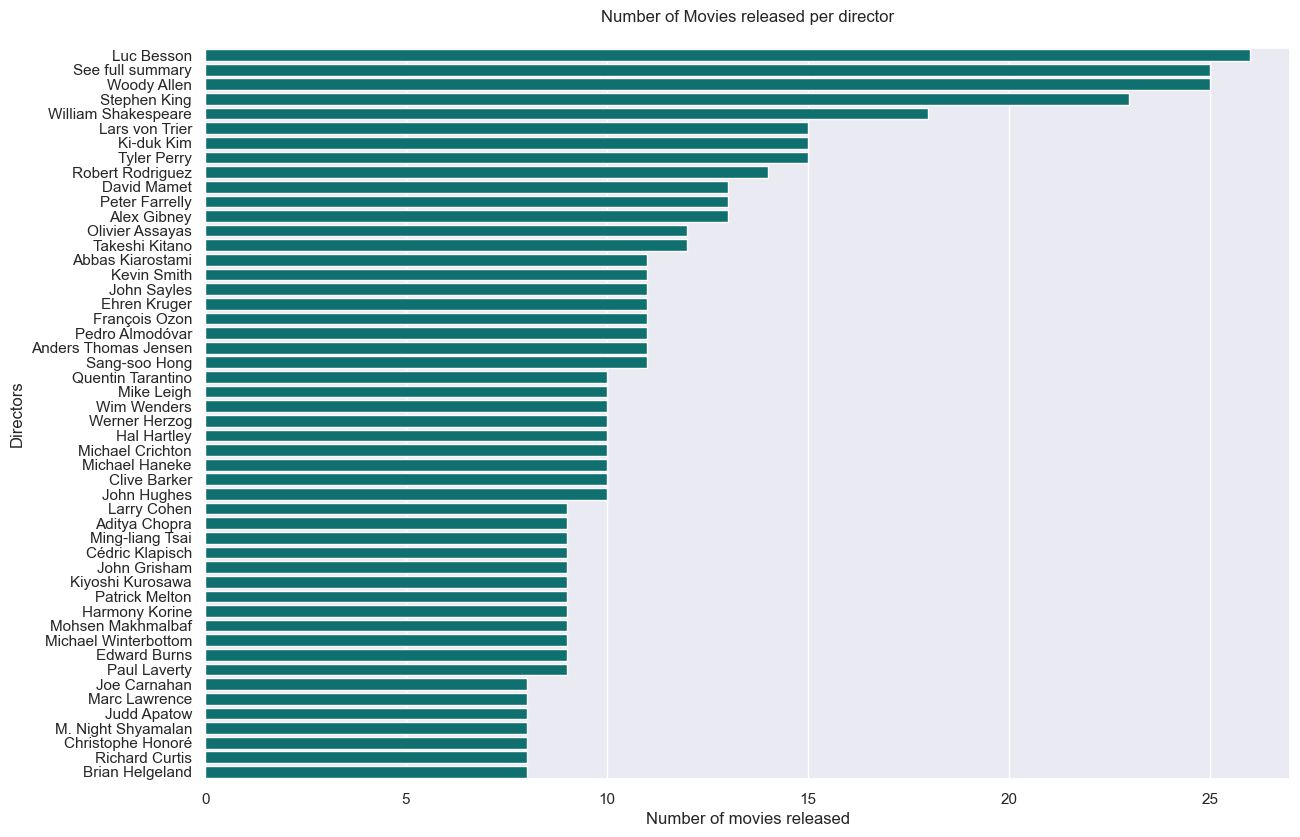

In [43]:
# visualize the number of movies per director
plt.figure(figsize = (14, 9.5))
sns.barplot(data = director_m.head(50), y = 'director', x = 'title', color = 'teal')
plt.ylabel('Directors')
plt.xlabel('Number of movies released')
plt.title('Number of Movies released per director\n')
plt.xlim(0, 27)
plt.show()

In [44]:
# Create a list from the dataframe of the movie count of directors
top_100_produced = list(director_m.director.head(100))

top_produced = data_1[data_1['director'].isin(top_100_produced)]

In [45]:
# find the mean rating for the movies
avg_per_director = df_merge3[['rating','movieId']].groupby('movieId').mean().reset_index()

In [46]:
# update the ratings of the movies with the average rating
top_produced = pd.merge(top_produced.drop('rating',1),avg_per_director,on='movieId').sort_values('rating',ascending=False)

In [47]:
print(f'Min_rating: \t{top_produced.rating.min()}\nMax_rating: \t{top_produced.rating.max()}\nMean_rating: \t{round(top_produced.rating.mean(),2)}')


Min_rating: 	0.5
Max_rating: 	4.5
Mean_rating: 	3.26


In [48]:
#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = data_1[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index =data_1[x].idxmax()
    high = pd.DataFrame(data_1.loc[high_index,:])
    low = pd.DataFrame(data_1.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",data_1['title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",data_1['title'][min_index])
    return pd.concat([high,low],axis = 1)
#call the find_minmax function.
find_minmax('budget')


Movie Which Has Highest budget :  My Neighbors the Yamadas (Hôhokekyo tonari no Yamada-kun) (1999)
Movie Which Has Lowest budget  :  Princess Mononoke (Mononoke-hime) (1997)


7898188  \
userId                                                     54917   
movieId                                                    32452   
rating                                                       5.0   
timestamp                                             1512290187   
title          My Neighbors the Yamadas (Hôhokekyo tonari no ...   
genres                                          Animation|Comedy   
title_cast     Yukiji Asaoka|Tôru Masuoka|Masako Araki|Hayato...   
director                                          Hisaichi Ishii   
runtime                                                    104.0   
budget                                                2000000000   
plot_keywords                 wedding|neighbor|kidnapping|speech   
numRatings                                                    55   
release_year                                                1999   

                                                         3146188  
userId                                                     37449  
movieId                                                     3000  
rating                                                       2.0  
timestamp                                             1108211185  
title                   Princess Mononoke (Mononoke-hime) (1997)  
genres                  Action|Adventure|Animation|Drama|Fantasy  
title_cast     Billy Crudup|Billy Bob Thornton|Minnie Driver|...  
director                                          Hayao Miyazaki  
runtime                                                    134.0  
budget                                               -2147483648  
plot_keywords       forest|anime|human animal relationship|curse  
numRatings                                                  5264  
release_year                                                1997

### Longest Movies

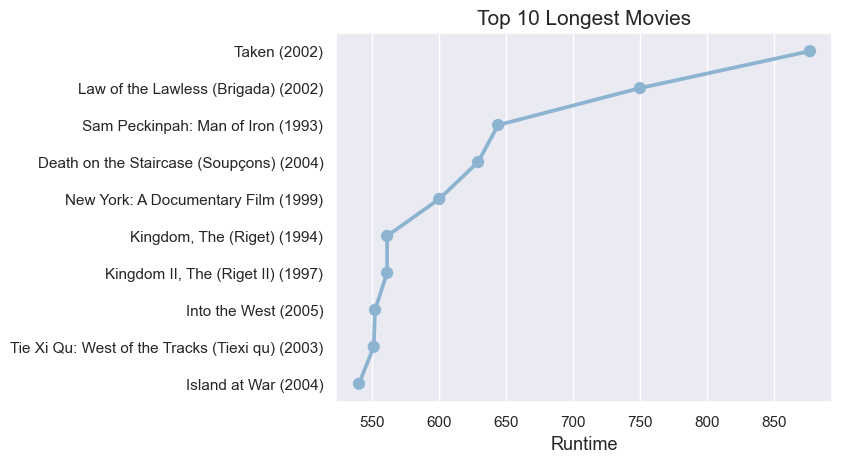

In [49]:
#top 10 Movies With Longest runtime
#sort the 'runtime' column in decending order and store it in the new dataframe.
info = pd.DataFrame(data_1['runtime'].sort_values(ascending = False))
info['title'] = data_1['title']
data = list(map(str,(info['title'])))

#extract the top 10 longest duraton movies data from the list and dataframe.
x = list(data[:10])
y = list(info['runtime'][:10])
#make the point plot and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Longest Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 13)
sns.set_style("darkgrid")

### Average Budget per year

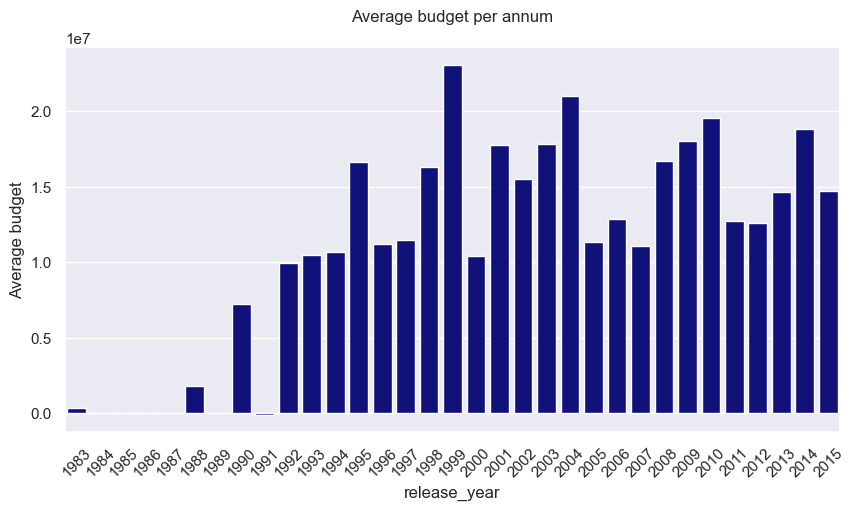

In [50]:
# create a dataframe with budget data
budget_data = pd.DataFrame(data_1.dropna().groupby('release_year').mean()['budget']).dropna()
budget_data.index = budget_data.index.astype('int')
runtime_data = budget_data[budget_data['budget']>1].copy()

# # make predictions
budget_data = budget_data.reset_index()
budget_data = budget_data.drop('budget',1).merge(pd.DataFrame(budget_data[budget_data['release_year']>1982]), on ='release_year')

# # visualize the budget per annum
plt.figure(figsize=(10,5))
sns.barplot(x='release_year',y='budget',data=budget_data, color='darkblue')
plt.title("Average budget per annum\n")
plt.ylabel("Average budget")
plt.xticks(rotation=45)
plt.show()

The noticeable rise in average movie budgets could be attributed to the use of CGI and special effects. This is especially relevant for streaming services, as networks and studios are creating their own streaming services, meaning their content is removed from existing streaming services. This puts pressure on streaming services to create more original content.

### Feature Correlation

In [51]:
def plot_correlation_map( df ):
    
    """"
    This function gives a correlation map
    using all the features from merged data.
    
    Input : dataframe column
    datatype : dataframe (integer)        
    
    output : Figure (bar plot)
    
    """
    # Plotting using the features
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

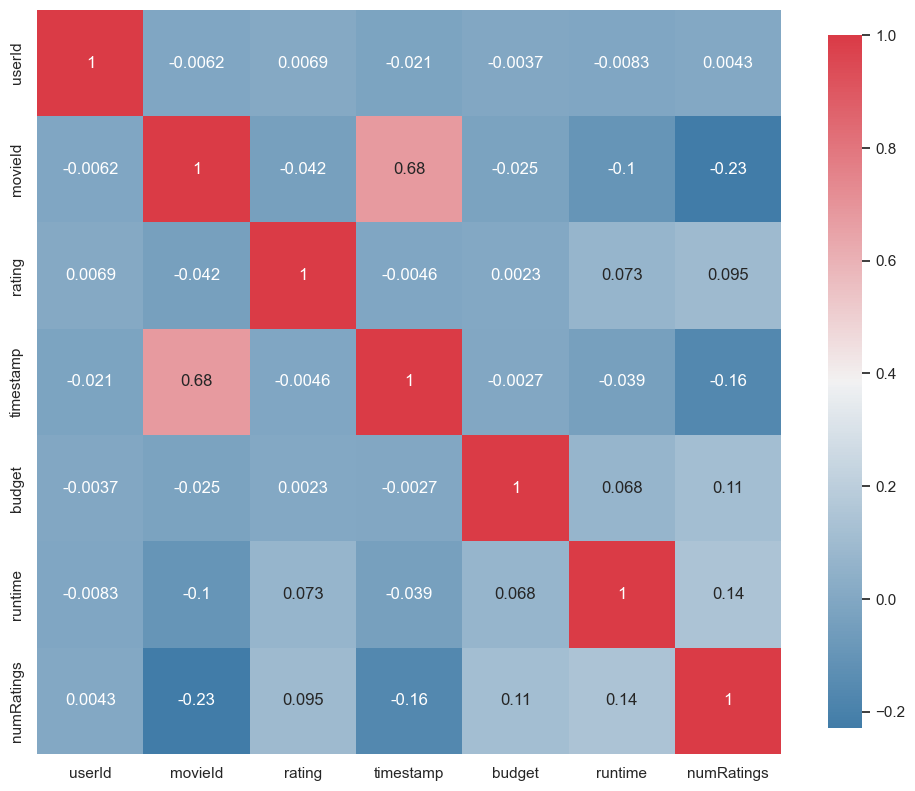

In [52]:
# Select a number of features from the dataframe to make the correlation map
plot_correlation_map(data_1[['userId','movieId','rating', 'timestamp', 'budget','runtime', 'numRatings']])

The analysis of the data does not show any significant positive relationships between the features, except for a strong correlation between movieId and timestamp. This could be due to the fact that movies have different lengths and do not all have the same ending time.

### Content Base Filtering and Collaborative Filtering

Content-based filtering is a system that uses a user's historical preferences to recommend products they may like in the future. This is done by finding similarities between items based on their description or context. However, it has certain limitations because it does not use other user data and does not allow for the discovery of potential new favourites. For example, if two users both enjoy action movies, but one also enjoys comedy, content-based filtering would keep offering action movies, limiting the potential of discovering the user's other interests.

##### Cosine similarities
Cosine similarity is a method for determining how alike two vectors are. It utilizes the cosine of the angle between the vectors to determine the similarity, with a rate ranging from 0 to 1. A similarity rate of 1 indicates that the vectors are the same, while a similarity rate of 0 indicates that they are completely different. The equation for calculating cosine similarity is cos(θ), where θ is the angle between the two vectors.

###### Advantage of Cosine similarities
The user can benefit from personalized product suggestions based on their preferences. This provides a more satisfying experience, as well as the opportunity to discover new items with no prior knowledge of the data needed.

###### Disadvantage of Cosine similarities

Using a content-based system for recommendations has its drawbacks. The user will never be exposed to different items, limiting the growth of the business. Additionally, if the user matrix or item matrix is altered the cosine similarity matrix must be recalculated, making the system labor-intensive. Furthermore, content analysis may not provide enough information to accurately differentiate items, which results in imprecise recommendations. Lastly, content-based filtering may lead to over-specialization, as users will only be recommended items similar to what they have already rated or searched for, rather than items that may be different but still applicable to their interests.

In [53]:
# Create a copy of a dataframe
movies = df_movies.copy()

In [54]:
# Merge two dataframes
df_merged = pd.merge(df_imdb[['movieId','title_cast','director', 'plot_keywords']], movies[['movieId', 'genres', 'title']], on='movieId', how='inner')
df_merged.head()

movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director                                      plot_keywords  \
0        John Lasseter                   toy|rivalry|cowboy|cgi animation   
1   Jonathan Hensleigh                   board game|adventurer|fight|game   
2  Mark Steven Johnson                         boat|lake|neighbor|rivalry   
3       Terry McMillan  black american|husband wife relationship|betra...   
4       Albert Hackett                    fatherhood|doberman|dog|mansion   

                                        genres  \
0  Adventure|Animation|Children|Comedy|Fantasy   
1                   Adventure|Children|Fantasy   
2                               Comedy|Romance   
3                         Comedy|Drama|Romance   
4                                       Comedy   

                                title  
0                    Toy Story (1995)  
1                      Jumanji (1995)  
2             Grumpier Old Men (1995)  
3            Waiting to Exhale (1995)  
4  Father of the Bride Part II (1995)

In [55]:
# Convert data types to strings for string handling
df_merged['title_cast'] = df_merged.title_cast.astype(str)
df_merged['plot_keywords'] = df_merged.plot_keywords.astype(str)
df_merged['genres'] = df_merged.genres.astype(str)
df_merged['director'] = df_merged.director.astype(str)

# Removing spaces between names
df_merged['director'] = df_merged['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df_merged['title_cast'] = df_merged['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes between the actors' full names and getting only the first three names
df_merged['title_cast'] = df_merged['title_cast'].map(lambda x: x.split('|'))
# Discarding the pipes between the plot keywords' and getting only the first five words
df_merged['plot_keywords'] = df_merged['plot_keywords'].map(lambda x: x.split('|'))
df_merged['plot_keywords'] = df_merged['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
df_merged['genres'] = df_merged['genres'].map(lambda x: x.lower().split('|'))
df_merged['genres'] = df_merged['genres'].apply(lambda x: " ".join(x))

df_merged.head()

movieId                                         title_cast  \
0        1  [tomhanks, timallen, donrickles, jimvarney, wa...   
1        2  [robinwilliams, jonathanhyde, kirstendunst, br...   
2        3  [waltermatthau, jacklemmon, sophialoren, ann-m...   
3        4  [whitneyhouston, angelabassett, lorettadevine,...   
4        5  [stevemartin, dianekeaton, martinshort, kimber...   

            director                                      plot_keywords  \
0       johnlasseter                   toy rivalry cowboy cgi animation   
1  jonathanhensleigh                   board game adventurer fight game   
2  markstevenjohnson                         boat lake neighbor rivalry   
3      terrymcmillan  black american husband wife relationship betra...   
4      alberthackett                    fatherhood doberman dog mansion   

                                        genres  \
0  adventure animation children comedy fantasy   
1                   adventure children fantasy   
2                               comedy romance   
3                         comedy drama romance   
4                                       comedy   

                                title  
0                    Toy Story (1995)  
1                      Jumanji (1995)  
2             Grumpier Old Men (1995)  
3            Waiting to Exhale (1995)  
4  Father of the Bride Part II (1995)

In [56]:
#we convert the tille_cast column from list to string
df_merged['liststring'] = df_merged['title_cast'].apply(lambda x: ','.join(map(str, x)))

#we remove the commas between the string in each row
df_merged['liststring'] = df_merged['liststring'].replace(',',' ', regex=True)

#we choose keywords, cast(liststring), diector and genres column to use as our features
df_features = df_merged[['liststring','director','plot_keywords','genres']]

#we combine the features columns into  single string
df_merged['combined_features'] = df_features['liststring'] +' '+ df_features['director'] +' '+ df_features['plot_keywords'] +' '+ df_features['genres']
#we now feed the combined features to a CountVectorizer() object for getting the cv matrix.
cv =CountVectorizer()
cv_matrix = cv.fit_transform(df_merged['combined_features'])

#now we obtain the cosine similarity matrix from the cv matrix
sim_score = cosine_similarity(cv_matrix,cv_matrix)

df_merged.set_index('title', inplace = True)
indices = pd.Series(df_merged.index)

In [57]:
print(sim_score)

[[1.         0.10910895 0.07715167 ... 0.03026138 0.         0.07881104]
 [0.10910895 1.         0.         ... 0.06163336 0.         0.08025724]
 [0.07715167 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.03026138 0.06163336 0.         ... 1.         0.         0.03338903]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.07881104 0.08025724 0.         ... 0.03338903 0.         1.        ]]


In [2]:
#Method to get recommenations
def recommendations(title,n,sim_score = sim_score):
    '''
    This method returns movies which are similar.
    
    Input:
        title: name of the movie to be compared
        n: number(quantity) of movies to be returned
        sim_core: similarity score
    Output:
        recommend movies
    '''
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]
 # creating a Series with the similarity scores in descending order
    score_series = pd.Series(sim_score[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_n_indexes = list(score_series.iloc[1:n+1].index)
    
    # populating the list with the titles of the best n matching movies
    for i in top_n_indexes:
        recommended_movies.append(list(df_merged.index)[i])
        
    return recommended_movies

NameError: name 'sim_score' is not defined

In [1]:
recommendations('Black Cauldron, The (1985)',10)

NameError: name 'recommendations' is not defined

We can see that the top 10 movie recommendations for Printed Rainbow in 2006 are all similar movies. To make the recommendations more effective, it would be better to only keep the most recent movies. Content-based filtering is not ideal in such cases as the number of items increases and the descriptions become more complex. To address these issues, collaborative filtering techniques should be used, as they are more reliable and scalable. Additionally, this method is much less memory intensive.

### Collaborative filtering

Collaborative filtering is a technique used to filter out items a user may like based on reactions from similar users. It works by searching a large group of people and finding a subset of users with similar tastes. It looks at the items they like and combines them to create a ranked list of suggestions for a particular user. To use collaborative filtering, a dataset is needed which is structured in a specific format. This data should include a set of items and users who have reacted to some of the items. The data is usually seen in the form of a matrix which consists of the ratings given by a set of users to a set of items. Advantages of using collaborative filtering over content-based filtering are that it takes other user ratings into consideration, and that it can adapt to the user's interest which may change over time.

In [60]:
# Creating a small test dataframe to evaluate our models
tests = df_train.copy()
tests.drop(['timestamp'], axis=1, inplace=True)
tests = tests.head(20000)

# Creating the training data
reader = Reader(rating_scale=(0.5, 5))
test_data = Dataset.load_from_df(tests[['userId','movieId','rating']], reader)

# Compute similarities between users using cosine distance
sim_options = {"name": "cosine",
               "user_based": True}  
# Evaluate the model 
user = KNNWithMeans(sim_options=sim_options)
cv = cross_validate(user, test_data, cv=5, measures=['RMSE'], verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1257  1.1150  1.1184  1.1202  1.1286  1.1216  0.0049  
Fit time          16.38   15.57   10.83   11.58   12.70   13.41   2.19    
Test time         0.17    0.14    0.08    0.08    0.08    0.11    0.04    


Using UBCF, we achieved a Root Mean Square Error (RMSE) score of 1.1 when evaluated on a 2% sample of the training data.

#### Item-item collaborative based filtering
Item-Item Collaborative Filtering is a method of recommendation which finds similarities between different movies in order to recommend similar movies to a user. This algorithm is much less resource-intensive than user-user collaborative filtering, meaning it takes considerably less time to process for new users. By creating a matrix of look-alike movies, it is easy to suggest similar options to a user based on their previously rated movies.

In [61]:
# Compute similarities between items using cosine distance
sim_options = {"name": "cosine",
               "user_based": False}  

# Fit the KNNwithmeans algorithm to the training set
item_based = KNNWithMeans(sim_options=sim_options)

# Evaluate the model 
cv = cross_validate(item_based, test_data, cv=5, measures=['RMSE'], verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0912  1.0814  1.0774  1.0895  1.0728  1.0825  0.0070  
Fit time          1.20    1.25    1.24    1.08    1.11    1.18    0.07    
Test time         0.08    0.11    0.06    0.06    0.08    0.08    0.02    


Using IBCF gave us an RMSE score of 1.08 on a 2% sample of the train data, only slightly better than the UBCF method.

#### Singular value decomposition (SVD)

In [62]:
# Loading as Surprise dataframe
train = df_train.copy()
reader = Reader()
# Data selected for model training
data = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)

In [63]:
from surprise.model_selection import train_test_split
# Data split 99/1
trainset, testset = train_test_split(data, test_size=0.50)

In [64]:
# Check the info of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [65]:
# Base algorithm
algo = SVD()

In [66]:
# Fitting our trainset
algo.fit(trainset)

In [67]:
# Using the 15% testset to make predictions
predictions = algo.test(testset) 
predictions

test = pd.DataFrame(predictions)

In [68]:
# View the head
test.head()

uid     iid  r_ui       est                    details
0   98001    1466   4.0  3.381551  {'was_impossible': False}
1  122707    1946   4.0  4.115634  {'was_impossible': False}
2  152899    5266   4.0  3.328780  {'was_impossible': False}
3   19997  201074   4.5  3.910514  {'was_impossible': False}
4   73100    1220   5.0  3.942639  {'was_impossible': False}

In [69]:
# We are trying to predict ratings for every userId / movieId pair, we implement the below list comprehension to achieve this.
ratings_predictions=[algo.predict(row.uid, row.iid) for _,row in test.iterrows()]
ratings_predictions

[Prediction(uid=98001, iid=1466, r_ui=None, est=3.381551036426136, details={'was_impossible': False}),
 Prediction(uid=122707, iid=1946, r_ui=None, est=4.115633922753844, details={'was_impossible': False}),
 Prediction(uid=152899, iid=5266, r_ui=None, est=3.3287795574809476, details={'was_impossible': False}),
 Prediction(uid=19997, iid=201074, r_ui=None, est=3.910514119252774, details={'was_impossible': False}),
 Prediction(uid=73100, iid=1220, r_ui=None, est=3.9426394254127954, details={'was_impossible': False}),
 Prediction(uid=5400, iid=5971, r_ui=None, est=3.6615756096003964, details={'was_impossible': False}),
 Prediction(uid=48660, iid=2662, r_ui=None, est=3.8486097535237396, details={'was_impossible': False}),
 Prediction(uid=49298, iid=3827, r_ui=None, est=2.6653671323825163, details={'was_impossible': False}),
 Prediction(uid=136023, iid=519, r_ui=None, est=3.0076918226654423, details={'was_impossible': False}),
 Prediction(uid=42148, iid=8974, r_ui=None, est=2.93405484451943

In [70]:
# Converting our prediction into a familiar format-Dataframe
df_pred=pd.DataFrame(ratings_predictions)
df_pred

uid     iid  r_ui       est                    details
0         98001    1466  None  3.381551  {'was_impossible': False}
1        122707    1946  None  4.115634  {'was_impossible': False}
2        152899    5266  None  3.328780  {'was_impossible': False}
3         19997  201074  None  3.910514  {'was_impossible': False}
4         73100    1220  None  3.942639  {'was_impossible': False}
...         ...     ...   ...       ...                        ...
5000014   88479    3594  None  3.230601  {'was_impossible': False}
5000015   20471    4053  None  3.262336  {'was_impossible': False}
5000016   29106     593  None  4.502733  {'was_impossible': False}
5000017   33063   53972  None  4.387742  {'was_impossible': False}
5000018   27263    4867  None  3.040332  {'was_impossible': False}

[5000019 rows x 5 columns]

In [71]:
# Renaming our predictions to original names
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

In [72]:
# Snippet of our ratings
df_pred.head()


userId  movieId    rating
0   98001     1466  3.381551
1  122707     1946  4.115634
2  152899     5266  3.328780
3   19997   201074  3.910514
4   73100     1220  3.942639

In [ ]:
# Concatenating userId/movieId into a single Id column.(code has to be run twice to get desired outcome)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)

In [ ]:
# View the first five rows of the dataframe
df_pred.head()

In [ ]:
# Drop the columns: 'userId' and 'movieId'
df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)

In [ ]:
# View the predicted dataset
df_pred = df_pred[['Id', 'rating']]


In [ ]:
# View the first 5 rows
df_pred.head()

In [ ]:
# View the shape of the dataset to be submitted 
df_pred.shape

In [ ]:
# The submitted base model
df_pred.to_csv("SVD_model_base.csv", index=False)

#### SVD prediction with altered parameters
Parameters:

n_factors – The number of factors. Default is 100.
n_epochs – The number of iteration of the SGD procedure. Default is 20.
init_mean – The mean of the normal distribution for factor vectors initialization. Default is 0.
init_std_dev – The standard deviation of the normal distribution for factor vectors initialization. Default is 0.1.
lr_all – The learning rate for all parameters. Default is 0.005.
reg_all – The regularization term for all parameters. Default is 0.02.

In [ ]:
# Copy of the train dataset
df_train = train.copy()
reader = Reader(rating_scale=(0, 5))
# Data for training the SVD model
sup_data= Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)

In [ ]:
# The full dataset for model training
sup_train = sup_data.build_full_trainset()
# The parameters obtained from randomised search CV
algo = SVD(n_factors = 300 , lr_all = 0.006 , reg_all = 0.04 , n_epochs = 60 , init_std_dev = 0.04)
# Fit the model
algo.fit(sup_train)

In [ ]:
# We are trying to predict ratings for every userId / movieId pair, we implement the below list comprehension to achieve this.
ratings_predictions=[algo.predict(row.userId, row.movieId) for _,row in test_df.iterrows()]
# View the predictions
ratings_predictions

In [ ]:
# Converting our prediction into a familiar format-Dataframe
df_pred=pd.DataFrame(ratings_predictions)
# View the predictions from a dataframe
df_pred

In [ ]:
# Renaming our predictions to original names
df_pred=df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
# Drop the columns not required for the submission
df_pred.drop(['r_ui','details'],axis=1,inplace=True)

In [ ]:
# Snippet of our ratings
df_pred.head()

In [ ]:
# Concatenating userId/movieId into a single Id column.(code has to be run twice to get desired outcome)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
df_pred['Id']=df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)

In [ ]:
# View the top 5 rows for the prediction
df_pred.head()

In [ ]:
# Drop the features that will not be required for the submission
df_pred.drop(['userId', 'movieId'], inplace=True, axis= 1)

In [ ]:
# Datframe that will be ready for submission
df_pred = df_pred[['Id', 'rating']]


In [ ]:
# View the first 5 rows 
df_pred.head()


In [ ]:
# Shape of the prediction dataset
df_pred.shape

In [ ]:
# Submission final csv. file
df_pred.to_csv("SVD_altered_params.csv", index=False)

### Conclusion

In this notebook, the movieLens dataset was used to create a recommender system. We observed that a high percentage of our movies were rated above 3, with Drama, Comedy, and Thriller being the three most popular genres. We attempted four different techniques for building a recommender system, but due to its computational inefficiency, we excluded content-based methods. Collaborative filtering methods were used to produce new recommendations, as they only draw on past interactions between users and items, and do not require item metadata. We found that sparsity and scalability were a challenge when we used user-based and item-based memory methods, so we settled on the singular value decomposition (SVD) method, which is computationally more efficient than content-based methods and also deals with the sparsity issue.

##### 
Drawbacks
The cold start problem is an issue that collaborative filtering methods have, but content based filtering methods do not. To address this, a hybrid recommender system can be utilized that utilizes both content and collaborative filtering for more effective recommendation.

#### References

Reference
https://codeburst.io/explanation-of-recommender-systems-in-information-retrieval-13077e1d916c [Accessed: 25/11/20]

www.quora.com. (n.d.). Recommendation Systems: What is the difference between item-to-item collaborative filtering and content-based filtering? - Quora. [online] Available at: https://www.quora.com/Recommendation-Systems-What-is-the-difference-between-item-to-item-collaborative-filtering-and-content-based-filtering

Lungu, C. (2018). Building a recommender system. [online] Machine Learning Blog. Available at: http://www.clungu.com/Building-a-recommender-system

Cold start problem - http://www.yusp.com/blog/cold-start-problem-recommender-systems/ 32a. Frank Kane, Sundog Education

Towards datascience. 2018. Building and Testing Recommender Systems With Surprise, Step-By-Step. [ONLINE] Available at: https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b. [Accessed 13 December 2020].

#### Comet

In [ ]:
# #Log Parameters of all models
# params ={'SVD_model type': 'SVD',
#          'SVD_Params': str(svd_params),
         
#          'stratify':True
# }

In [ ]:
# # Log our parameters and results
# experiment.log_parameters(params)

In [ ]:
# experiment.end()
# experiment.display